<a href="https://colab.research.google.com/github/joshuabdixon/Titanic-Survival-Prediction-with-Neural-Networks/blob/main/Titanic_Dataset_Predictions_with_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset - Neural Networks

## Scenario
In this activity, I built neural network models to predict survivors of the Titanic voyage using the Titanic dataset. This builds upon my previous model developed with the CatBoost Algorithm. Lessons learned from that attempt have been incorporated, especially in terms of data preprocessing and feature engineering. I created and trained models with both Adam and RMSProp optimisers, evaluating their effectiveness.

## Rationale and Approach
For this activity, I followed a structured approach:

- **Exploratory Data Analysis and Preprocessing**: Carried out EDA, cleaned and transformed the dataset for neural network training.
- **Data Splitting**: Split the data into training, validation, and test sets.
- **Model Definition**: Defined a function to create and train neural network models using the same parameters for Adam and RMSProp to ensure a fair comparison.
- **Regularisation Techniques**: Explored the impact of L2 regularisation and dropout on both models.
- **Early Stopping**: Incorporated early stopping callbacks and compared their impact on model accuracy and loss.
- **Evaluation**: Evaluated which optimiser was most effective through detailed comparison and visualisation.

## Reflections and Conclusions
- **Data Preprocessing**: The Titanic dataset was unclean and required substantial data preprocessing. I enjoyed this challenge and implementing more refined methods that I had learned since my previous Kaggle competition with this dataset.
- **Performance of Optimisers**: Both the Adam and RMSProp optimisers achieved similar results in terms of accuracy, with RMSProp generally having slightly higher test accuracies. Adam typically had lower test loss values in the earlier epochs, but both optimisers converged to approximately 48-50% loss after 30-40 epochs.This would vary when the models were re-run, but the overall performance as consistent.
- **Impact of L2 Regularisation and Dropout**: Including L2 regularisation led to a slight decrease in test loss and improved overall model smoothness. This was expected since L2 regularisation penalises large weights directly. A dropout rate of 20% had no significant impact, while a dropout rate of 50% slightly diminished performance. This might be because the initial model already had a relatively low number of neurons.
- **Early Stopping**: The incorporation of early stopping significantly increased computational efficiency.
- **Experiment Design**: I ensured a valid comparison with these techniques by maintaining consistent conditions across experiments.

### Phase 1: Initial Comparison of Optimisers
- **Exploratory Data Analysis Data Preparation**: Visualised the data, dropped irrelevant columns, converted categorical data, filled missing values, and standardised features.
- **Model Building**: Created and trained models with Adam and RMSProp.
- **Evaluation**: Compared model accuracy and loss to determine which optimiser performed better.

### Phase 2: Impact of Regularisation
- **Regularisation Techniques**: Incorporated L2 regularisation and dropout into the models.
- **Model Training**: Trained models with both Adam and RMSProp using these techniques.
- **Comparison**: Evaluated the impact of regularisation on model performance.

### Phase 3: Early Stopping
- **Early Stopping**: Implemented early stopping callbacks in the models.
- **Performance Evaluation**: Compared the accuracy and loss of models with early stopping.


# Phase 1: Initial Comparison of Optimisers

## a. Data Exploration and Preparation

In [ ]:
# Import the relevant libraries.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Titanic data set.
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**PassengerId**: This is the unique ID of the row and doesn't affect the target variable.

**Survived**: The target variable we are trying to predict:
- 1 = Survived
- 0 = Not Survived

**Pclass**: The ticket class:
- 1 = 1st (Upper Class)
- 2 = 2nd (Middle Class)
- 3 = 3rd (Lower Class)

**SibSp**: The total number of siblings and spouses aboard the Titanic.

**Parch**: The total number of parents and children aboard the Titanic.

**Ticket**: The ticket number of the passenger.

**Fare**: The fare paid by the passenger.

**Cabin**: The cabin number of the passenger.

**Embarked**: The port of embarkation (categorical feature with 3 unique values):
- C = Cherbourg
- Q = Queenstown
- S = Southampton

In [ ]:
# Missing values?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
### Define a function to quantify number of missing values

def find_missing_values(data, columns):
    """
    Function to identify and return the number of missing (NaN) values in each specified column of a DataFrame.

    :param df: DataFrame in which to find missing values.
    :param columns: List of columns in the DataFrame to check for missing values.

    :return: A dictionary with column names as keys and the count of missing values as values.
    """

    print("The missing or NaN values from each column are as follows:")

    # Initialise an empty dictionary to store the count of missing values per column
    missing_values = {}

    # Iterate over each column and count the number of missing values
    for column in columns:
        # Count and assign the number of missing values for the current column
        missing_values[column] = data[column].isnull().sum()
    return missing_values

missing_values = find_missing_values(data, columns = data.columns)
missing_values

The missing or NaN values from each column are as follows:


{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [ ]:
# View the data set shape
data.shape

(891, 12)

The data is a sample of 891 from total of 2240 passenfers on the Titanic. Age, Cabin and Embarked have missing values.

In [ ]:
# Description Statistics
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Survival Rate by Sex

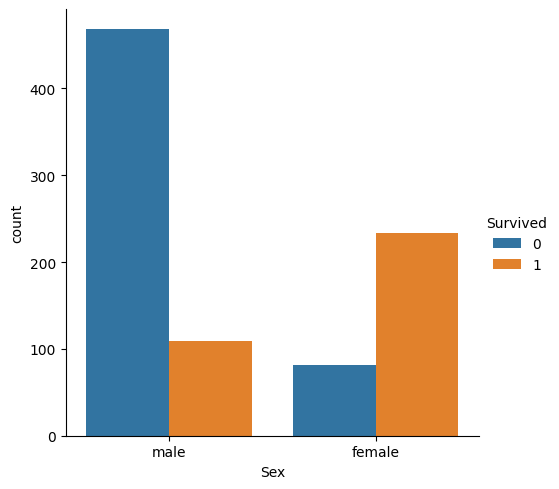

In [ ]:
# Visualise the data.
# Create a catplot.

sns.catplot(x ="Sex", hue ="Survived",
            kind ="count", data = data)

### Handling Missing Values: Age

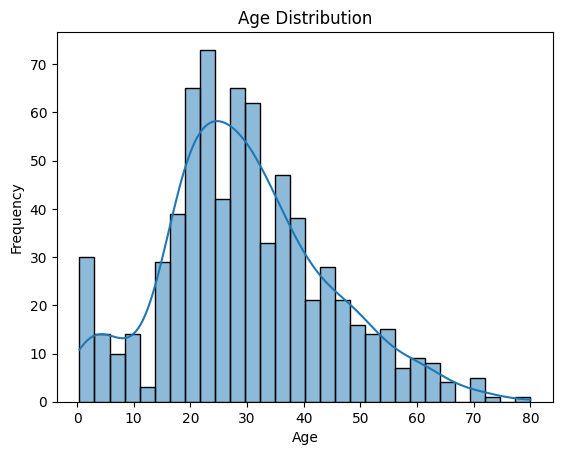

In [ ]:
# Plotting the distribution of the Age column
sns.histplot(data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- The histogram of the Age column shows that the data is right-skewed, with a few outliers on the higher end. This distribution suggests that median imputation might be more appropriate than mean imputation, as the median is less affected by the skewness and outliers.
- Let's explore the median age by group for more context specific, this will likely have a positive impact on accuracy

In [ ]:
# Determine median age for all passengers
median_age = data["Age"].median()

# Median age by Pclass and Sex
age_by_pclass_sex = data.groupby(["Sex", "Pclass"])["Age"].median()

# Median age for each group
for Pclass in data['Pclass'].unique():
  for Sex in data["Sex"].unique():
    print('Median age of Pclass {} {}s: {}'.format(Pclass, Sex, age_by_pclass_sex[Sex][Pclass]))
print(f'Median age of all passengers: {median_age}')

Median age of Pclass 3 males: 25.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 1 males: 40.0
Median age of Pclass 1 females: 35.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 2 females: 28.0
Median age of all passengers: 28.0


In [ ]:
# Median age by Pclass and Sex
age_by_pclass_sex = data.groupby(["Sex", "Pclass"])["Age"].median()
age_by_pclass_sex

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [ ]:
# Calculate the median age for each group
medians = data.groupby(['Sex', 'Pclass'])['Age'].transform('median')
print("\nMedians for each group:")
print(medians)


Medians for each group:
0      25.0
1      35.0
2      21.5
3      35.0
4      25.0
       ... 
886    30.0
887    35.0
888    21.5
889    40.0
890    25.0
Name: Age, Length: 891, dtype: float64


In [ ]:
# Replace missing 'Age' values with the median for each category
data['NewAge'] = data['Age']
data["NewAge"] = data["NewAge"].fillna(medians)

In [ ]:
# Show only the rows where 'Age' is null
comparison = data[data["Age"].isnull()][["NewAge","Age","Pclass","Sex"]]
print("\nComparison of 'Age' 'NewAge', 'Pclass' and 'Sex' where 'Age' is null:")
print(comparison)


Comparison of 'Age' 'NewAge', 'Pclass' and 'Sex' where 'Age' is null:
     NewAge  Age  Pclass     Sex
5      25.0  NaN       3    male
17     30.0  NaN       2    male
19     21.5  NaN       3  female
26     25.0  NaN       3    male
28     21.5  NaN       3  female
..      ...  ...     ...     ...
859    25.0  NaN       3    male
863    21.5  NaN       3  female
868    25.0  NaN       3    male
878    25.0  NaN       3    male
888    21.5  NaN       3  female

[177 rows x 4 columns]


### Tickets

In [ ]:
# Explore Ticket Feature
# How many kinds of ticket are there?
unique_tickets = len(data.Ticket.value_counts())
unique_tickets

681

Tickets will be dropped drom the dataset as too many unique values will complicate the model.

### Embarked

In [ ]:
# Explore Embarked
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,62.0


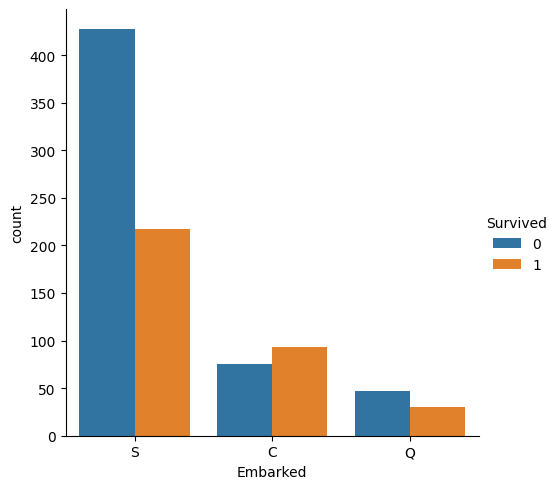

In [ ]:
# Create a catplot.
sns.catplot(x ='Embarked', hue ='Survived',
            kind ='count', data = data)

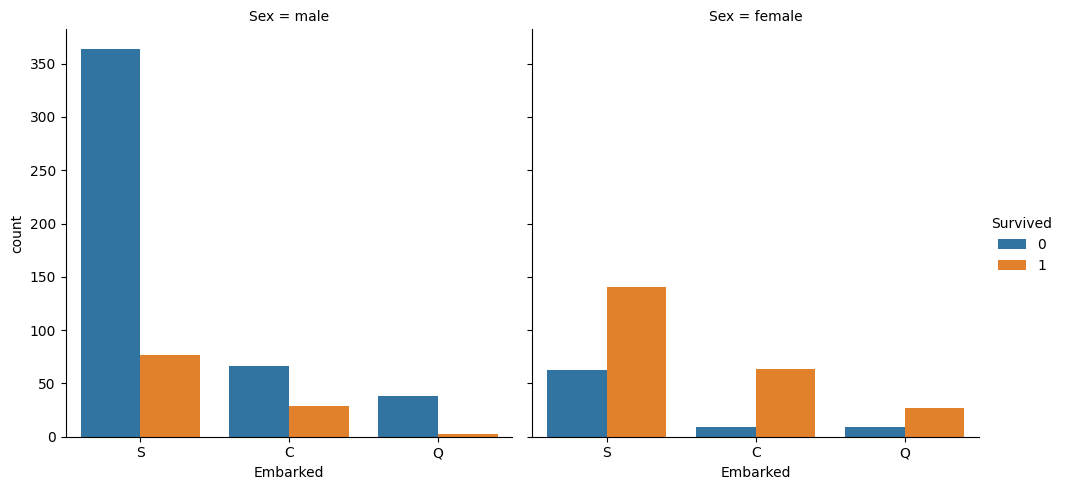

In [ ]:
# Create a second catplot.
sns.catplot(x ='Embarked', hue ='Survived',
            kind ='count', col = "Sex",
            data = data)

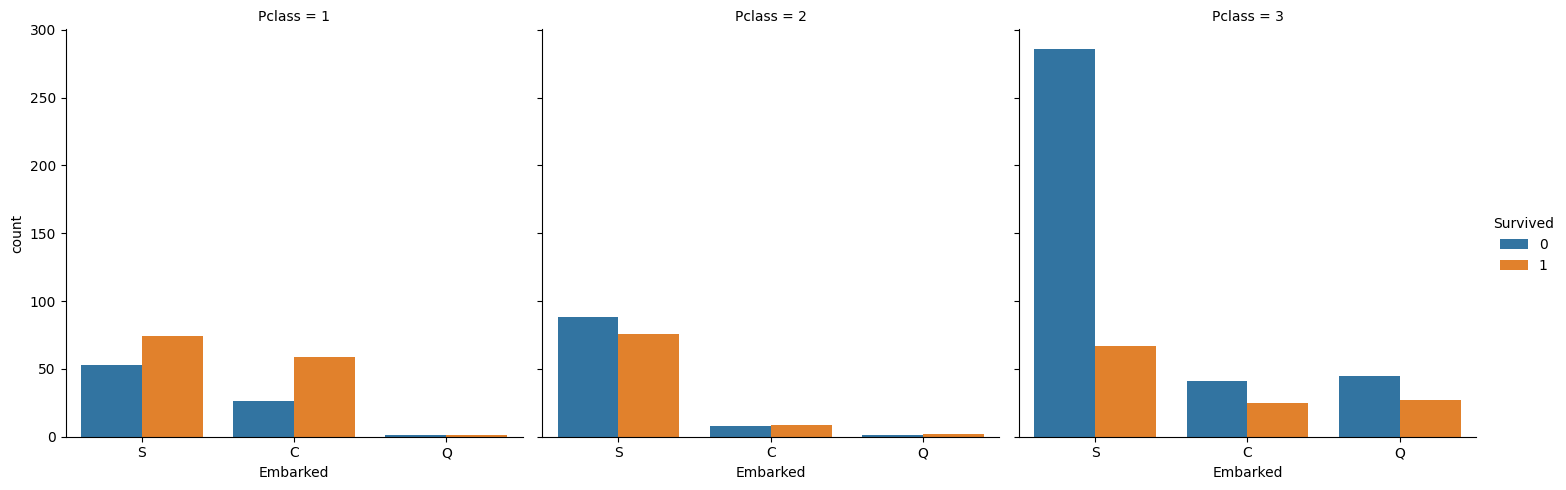

In [ ]:
# Create a third catplot.
sns.catplot(x ='Embarked', hue ='Survived',
            kind ='count', col ='Pclass',
            data = data)

The plots above clearly show that Southampton (S) is the frequent Embarked feature. Therefore will be used to fill the 2 missing Embarked values

In [ ]:
# Fill missing Embarked values
data['Embarked'] = data['Embarked'].fillna('S')

### Drop the remaining features

In [ ]:
# Drop features that are not needed.
data = data.drop(columns=['PassengerId','Name','Ticket','Cabin','Age'])

# View the DataFrame.
print(data.shape)
data.head()

(891, 8)


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,NewAge
0,0,3,male,1,0,7.2500,S,22.0
1,1,1,female,1,0,71.2833,C,38.0
2,1,3,female,0,0,7.9250,S,26.0
3,1,1,female,1,0,53.1000,S,35.0
4,0,3,male,0,0,8.0500,S,35.0


### Define target variable and encode categorical variables

In [ ]:
# Specify the variables.
X = data.drop(columns=['Survived'])
y = data['Survived']

# View output.
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (891, 7)
y shape:  (891,)


### SibSp and Parch as categorical or numerical?

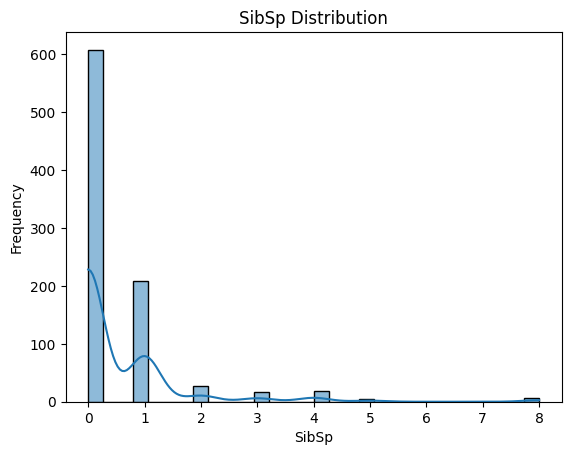

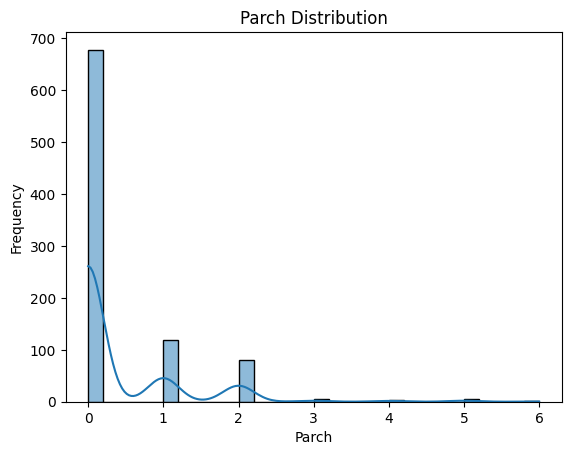

In [ ]:
# Plotting the distribution of SibSp, Parch and Pclass
sns.histplot(data['SibSp'], bins=30, kde=True)
plt.title('SibSp Distribution')
plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data['Parch'], bins=30, kde=True)
plt.title('Parch Distribution')
plt.xlabel('Parch')
plt.ylabel('Frequency')
plt.show()

### Rationale for Categorical Treatment
- Non-Linear Relationships: The survival probability might not increase or decrease linearly with the number of siblings/spouses or parents/children. For example, having 1 sibling/spouse might impact survival differently than having 3, in ways that a linear relationship would not capture.
- Distinct Impact: Each count (0, 1, 2, etc.) could have a distinct impact on the outcome, which one-hot encoding can capture effectively.
- Sparsity of Higher Values: Since higher values are rare, treating them as distinct categories helps the model to potentially assign higher weights to these rare occurrences if they are significant.

In [ ]:
# Convert categorical features to one-hot encodings (e.g. 'Sex')
# Drop one value of each to avoid multicollinearity
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
X = pd.get_dummies(X, columns=['Pclass'], drop_first=True)
X = pd.get_dummies(X, columns=['Embarked'], drop_first=True)
X = pd.get_dummies(X, columns=['SibSp'], drop_first=True)
X = pd.get_dummies(X, columns=['Parch'], drop_first=True)

# View output.
print(X.shape)
X.head()

(891, 19)


,Fare,NewAge,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,7.2500,22.0,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False
1,71.2833,38.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,7.9250,26.0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,53.1000,35.0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
4,8.0500,35.0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Convert all boolean columns to integers
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# Display the DataFramebut to verify the changes
X.head()

,Fare,NewAge,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,7.2500,22.0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,71.2833,38.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,7.9250,26.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,53.1000,35.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,8.0500,35.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Split the data and standardise

In [ ]:
# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [ ]:
X_train.shape

(640, 19)

In [ ]:
# Standardise the features.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val=scaler.fit_transform(X_val)

## b. Model Building and Evaluation

### Model Architecture/Function


In [ ]:
# Define the model architecture.
def create_model(optimizer='adam'):
    model = Sequential([
        # First hidden layer with 12 neurons and ReLU activation
        Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
        # Second hidden layer with 32 neurons and ReLU activation
        Dense(32, activation='relu'),
        # Output layer with 1 neuron and sigmoid activation for binary classification
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
        optimizer=optimizer,         # Optimizer (default is 'adam')
        metrics=['accuracy']         # Accuracy metric to evaluate the model
    )
    return model

### Adam Optimiser

In [ ]:
# Train the model with an Adam optimiser.
adam_model = create_model(optimizer='adam')
adam_history = adam_model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val), verbose=0)

### RMSProp Optimiser

In [ ]:
# Train the model with an RMSProp optimiser.
rmsprop_model = create_model(optimizer='rmsprop')
rmsprop_history = rmsprop_model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val), verbose=0)

### Evaluate and plot the models

In [ ]:
adam_test_loss, adam_test_acc = adam_model.evaluate(X_test, y_test, verbose=0)
rmsprop_test_loss, rmsprop_test_acc = rmsprop_model.evaluate(X_test, y_test, verbose=0)

print('Adam optimizer:')
print('Test loss:', adam_test_loss)
print('Test accuracy:', adam_test_acc)

print('\nRMSprop optimizer:')
print('Test loss:', rmsprop_test_loss)
print('Test accuracy:', rmsprop_test_acc)

Adam optimizer:
Test loss: 0.43957796692848206
Test accuracy: 0.7765362858772278

RMSprop optimizer:
Test loss: 0.4926314651966095
Test accuracy: 0.7877094745635986


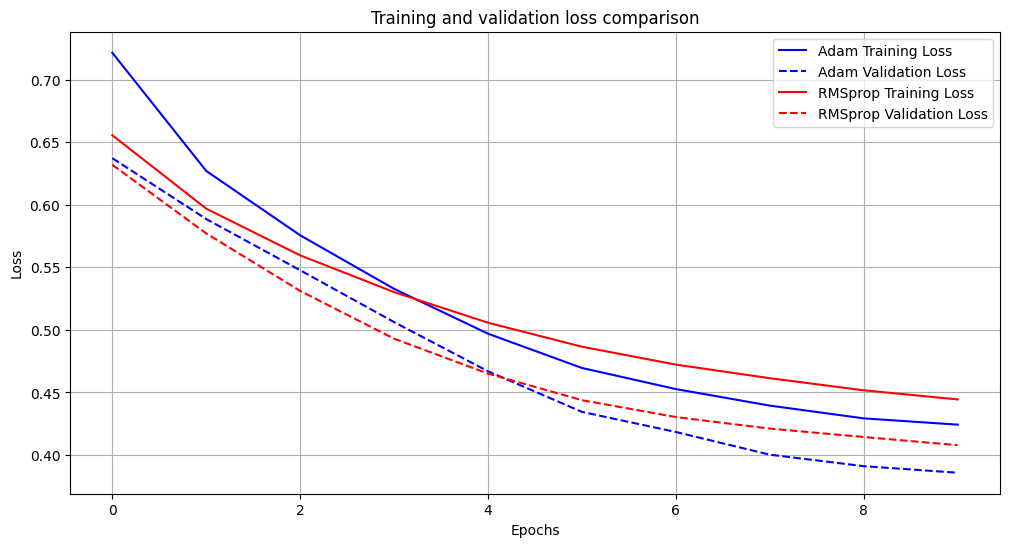

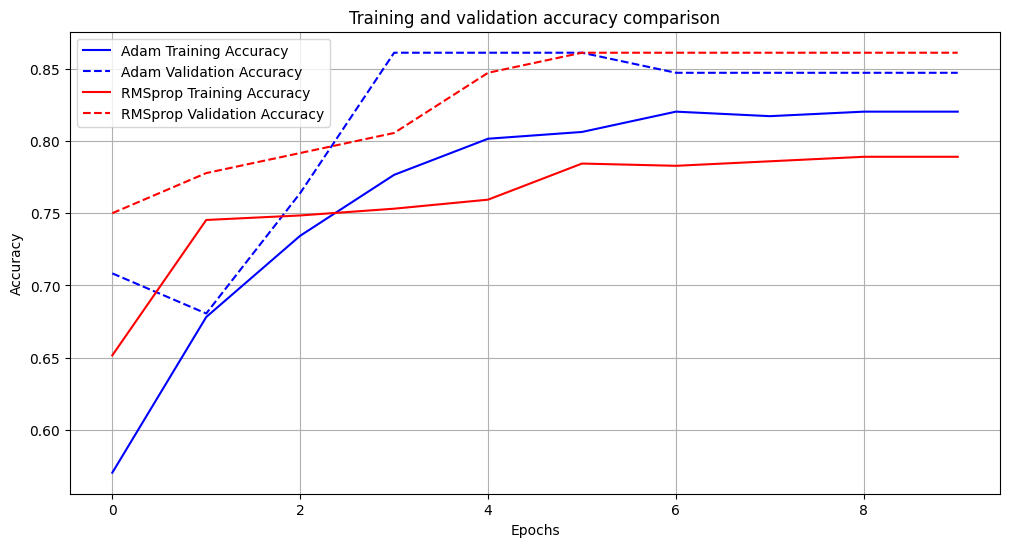

In [ ]:
# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(adam_history.history['loss'], label='Adam Training Loss', color='blue')
plt.plot(adam_history.history['val_loss'], label='Adam Validation Loss', color='blue', linestyle='--')
plt.plot(rmsprop_history.history['loss'], label='RMSprop Training Loss', color='red')
plt.plot(rmsprop_history.history['val_loss'], label='RMSprop Validation Loss', color='red', linestyle='--')
plt.title('Training and validation loss comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy.
plt.figure(figsize=(12, 6))
plt.plot(adam_history.history['accuracy'], label='Adam Training Accuracy', color='blue')
plt.plot(adam_history.history['val_accuracy'], label='Adam Validation Accuracy', color='blue', linestyle='--')
plt.plot(rmsprop_history.history['accuracy'], label='RMSprop Training Accuracy', color='red')
plt.plot(rmsprop_history.history['val_accuracy'], label='RMSprop Validation Accuracy', color='red', linestyle='--')
plt.title('Training and validation accuracy comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

- Based on the observed performance, the Adam optimiser is recommended for this neural network model on the Titanic dataset, given its higher test accuracy and faster convergence, indicating better overall performance. However, the overall performance of the models are similar.
- The experiment is a valid comparison of the two optimizers because it maintains a consistent model architecture, hyperparameters, and data splits, ensuring that any observed differences in performance are due to the optimisers themselves. The results show that while both Adam and RMSprop are effective, Adam has a slight edge in terms of convergence speed and final test accuracy, making it the preferred choice for this neural network model on the Titanic dataset.
- The repeated runs demonstrate that while both Adam and RMSprop are effective optimisers, Adam consistently outperforms RMSprop in terms of training/validation loss and accuracy. This consistent performance across multiple runs validates the robustness and reliability of Adam for this particular neural network model on the Titanic dataset.

### Increase number of epochs
- It appears that model metrics begin to plateu just before around 10 epochs. Additional epochs will be explored to check if the model has fully converged

In [ ]:
# Train the model with an Adam optimiser.
adam_model = create_model(optimizer='adam')
adam_history = adam_model.fit(X_train, y_train, epochs=80, batch_size=16, validation_data=(X_val, y_val), verbose=0)

In [ ]:
# Train the model with an RMSProp optimiser.
rmsprop_model = create_model(optimizer='rmsprop')
rmsprop_history = rmsprop_model.fit(X_train, y_train, epochs=80, batch_size=16, validation_data=(X_val, y_val), verbose=0)

In [ ]:
adam_test_loss, adam_test_acc = adam_model.evaluate(X_test, y_test, verbose=0)
rmsprop_test_loss, rmsprop_test_acc = rmsprop_model.evaluate(X_test, y_test, verbose=0)

print('Adam optimizer:')
print('Test loss:', adam_test_loss)
print('Test accuracy:', adam_test_acc)

print('\nRMSprop optimizer:')
print('Test loss:', rmsprop_test_loss)
print('Test accuracy:', rmsprop_test_acc)

Adam optimizer:
Test loss: 0.4822015166282654
Test accuracy: 0.8044692873954773

RMSprop optimizer:
Test loss: 0.4958564341068268
Test accuracy: 0.7988826632499695


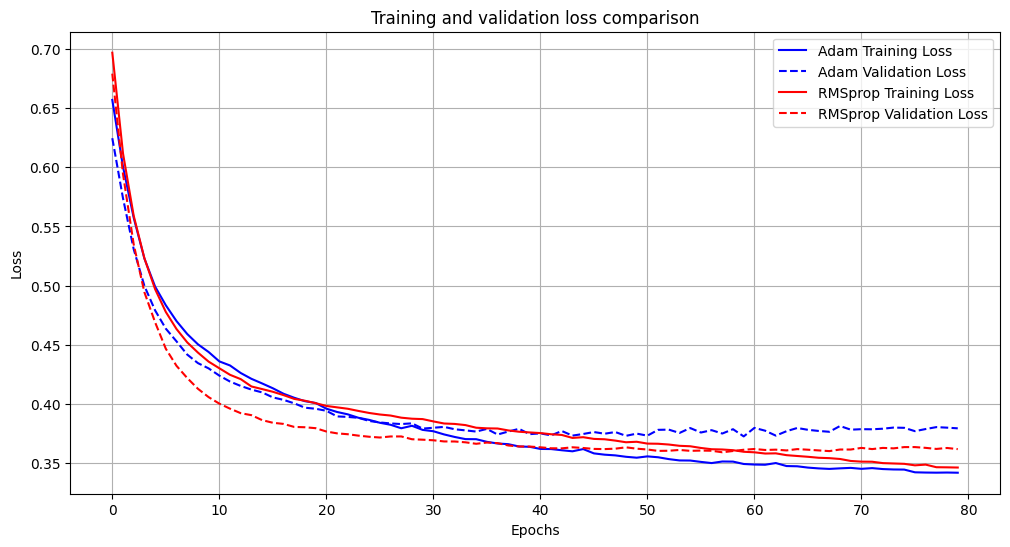

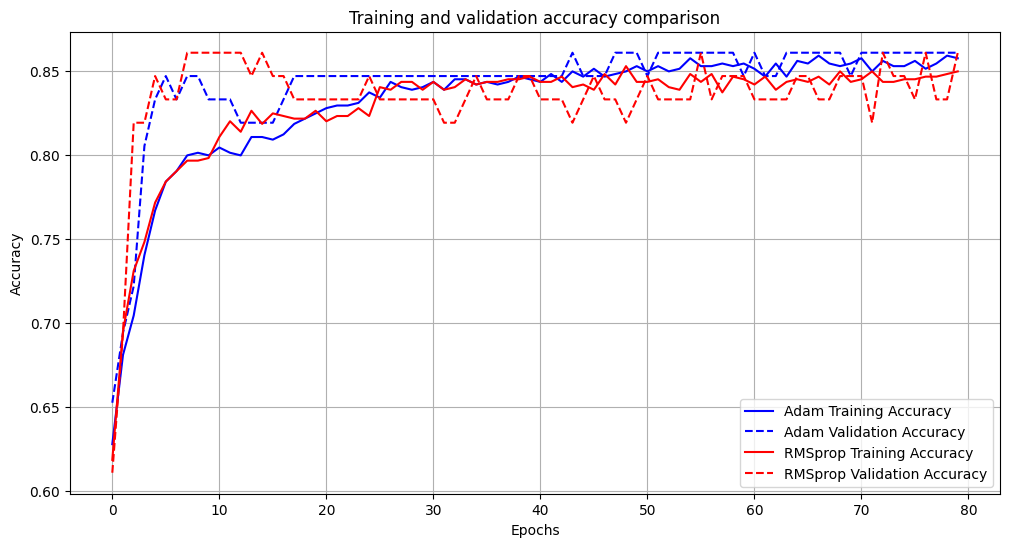

In [ ]:
# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(adam_history.history['loss'], label='Adam Training Loss', color='blue')
plt.plot(adam_history.history['val_loss'], label='Adam Validation Loss', color='blue', linestyle='--')
plt.plot(rmsprop_history.history['loss'], label='RMSprop Training Loss', color='red')
plt.plot(rmsprop_history.history['val_loss'], label='RMSprop Validation Loss', color='red', linestyle='--')
plt.title('Training and validation loss comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy.
plt.figure(figsize=(12, 6))
plt.plot(adam_history.history['accuracy'], label='Adam Training Accuracy', color='blue')
plt.plot(adam_history.history['val_accuracy'], label='Adam Validation Accuracy', color='blue', linestyle='--')
plt.plot(rmsprop_history.history['accuracy'], label='RMSprop Training Accuracy', color='red')
plt.plot(rmsprop_history.history['val_accuracy'], label='RMSprop Validation Accuracy', color='red', linestyle='--')
plt.title('Training and validation accuracy comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

For this neural network model on the Titanic dataset, the Adam optimiser consistently outperforms RMSprop in terms of both loss and accuracy metrics. Training for around 30-40 epochs seems to be optimal, as extending beyond this point shows diminishing returns in terms of performance improvements.

It is noted the training Loss and Accuracy becomes in the later epochs. This is possibly due to small batch size of 16. This will remain for consistency in further analysis.

# Phase 2: Impact of Regularisation

## Objective
Using the neural network model you built above, modify the ‘create_model’ function to include dropout and L2 regularisation.

## Assessment criteria
By completing this activity, you will be able to provide evidence that you can:
- define a function to create and train a neural network model
- interpret model output and explain your conclusions
- select the appropriate model and justify your choice.

## Activity steps
1. Import the L2 regulariser and dropout.
3. Run a model function with dropout and regularisation included.
4. Create and train a model with Adam optimisation, l2 regularisation and dropout.
5. Create and train a model with RMSProp optimisation, l2 regularisation and dropout.
6. Plot model accuracy and loss.
7. Evaluate the models.


In [ ]:
# Import the regulariser and dropout.
from keras.regularizers import l2
from keras.layers import Dense, Dropout

In [ ]:
# Modify the create_model function to include l2 regularisation and dropout
def create_model(optimizer='adam', l2_reg=0.01, dropout_rate=0.2):
    model = Sequential([
        # First hidden layer with L2 regularisation and dropout
        Dense(12, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(l2_reg)),
        Dropout(dropout_rate),
        # Second hidden layer with L2 regularisation and dropout
        Dense(32, activation='relu', kernel_regularizer=l2(l2_reg)),
        Dropout(dropout_rate),
        # Output layer with 1 neuron and sigmoid activation for binary classification
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
        optimizer=optimizer,         # Optimizer (default is 'adam')
        metrics=['accuracy']         # Accuracy metric to evaluate the model
    )
    return model


In [ ]:
# Train the model with Adam optimizer, L2 regularisation, and dropout
adam_model = create_model(optimizer='adam')
adam_history = adam_model.fit(X_train, y_train, epochs=80, batch_size=16, validation_data=(X_val, y_val), verbose=0)

# Train the model with RMSProp optimizer, L2 regularisation, and dropout
rmsprop_model = create_model(optimizer='rmsprop')
rmsprop_history = rmsprop_model.fit(X_train, y_train, epochs=80, batch_size=16, validation_data=(X_val, y_val), verbose=0)

# Evaluate the models
adam_test_loss, adam_test_acc = adam_model.evaluate(X_test, y_test, verbose=0)
rmsprop_test_loss, rmsprop_test_acc = rmsprop_model.evaluate(X_test, y_test, verbose=0)

print('Adam optimizer with L2 and Dropout:')
print('Test loss:', adam_test_loss)
print('Test accuracy:', adam_test_acc)

print('\nRMSprop optimizer with L2 and Dropout:')
print('Test loss:', rmsprop_test_loss)
print('Test accuracy:', rmsprop_test_acc)

Adam optimizer with L2 and Dropout:
Test loss: 0.4638264775276184
Test accuracy: 0.7988826632499695

RMSprop optimizer with L2 and Dropout:
Test loss: 0.4619799554347992
Test accuracy: 0.8044692873954773


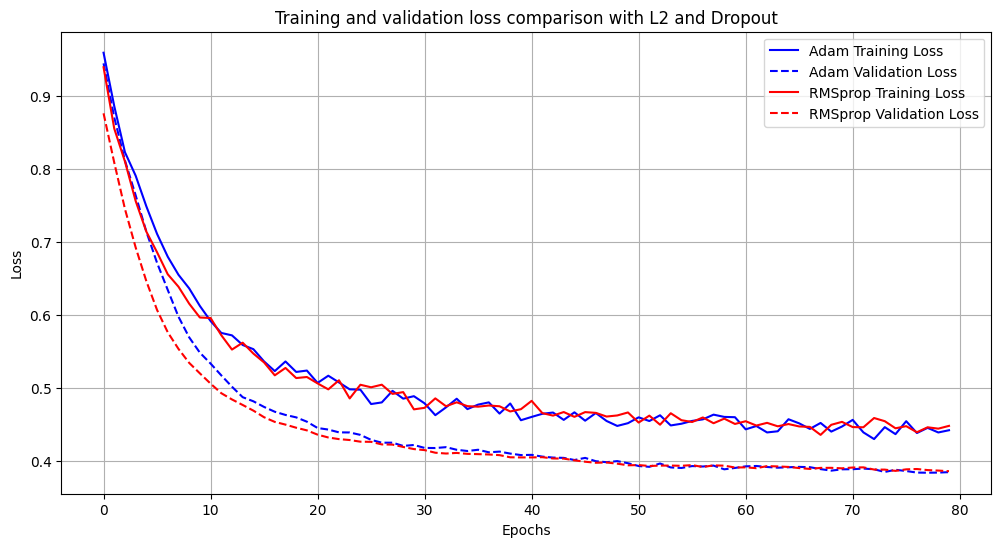

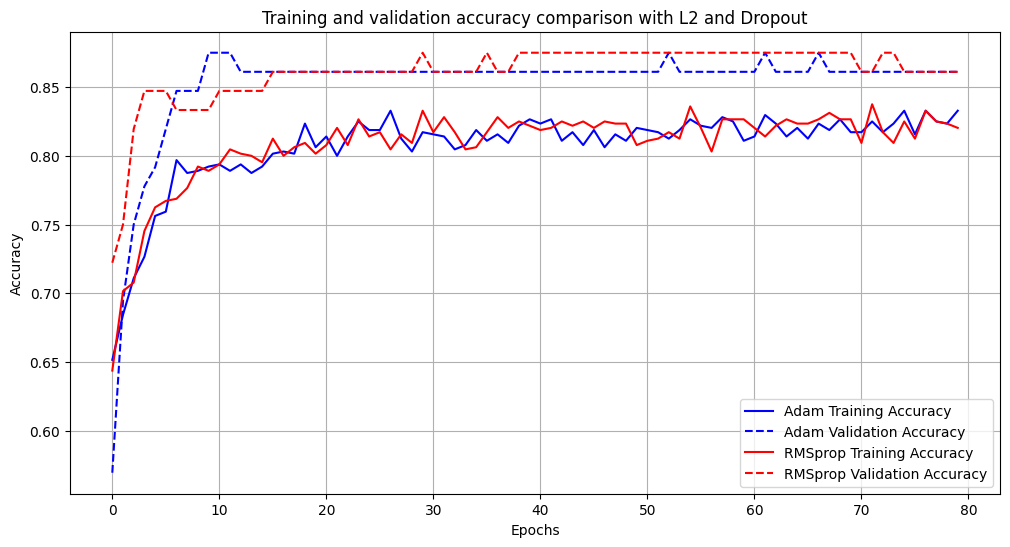

In [ ]:
# Plot the loss
plt.figure(figsize=(12, 6))
plt.plot(adam_history.history['loss'], label='Adam Training Loss', color='blue')
plt.plot(adam_history.history['val_loss'], label='Adam Validation Loss', color='blue', linestyle='--')
plt.plot(rmsprop_history.history['loss'], label='RMSprop Training Loss', color='red')
plt.plot(rmsprop_history.history['val_loss'], label='RMSprop Validation Loss', color='red', linestyle='--')
plt.title('Training and validation loss comparison with L2 and Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot the accuracy
plt.figure(figsize=(12, 6))
plt.plot(adam_history.history['accuracy'], label='Adam Training Accuracy', color='blue')
plt.plot(adam_history.history['val_accuracy'], label='Adam Validation Accuracy', color='blue', linestyle='--')
plt.plot(rmsprop_history.history['accuracy'], label='RMSprop Training Accuracy', color='red')
plt.plot(rmsprop_history.history['val_accuracy'], label='RMSprop Validation Accuracy', color='red', linestyle='--')
plt.title('Training and validation accuracy comparison with L2 and Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Incorporating L2 regularization of 0.01 and dropout of 0.2 while keeping all other parameters constant resulted in subtle improvements. There were slightly fewer fluctuations in loss and accuracy. Both models, with and without L2 regularisation and dropout, showed small differences between training and validation accuracy, suggesting good generalisation.

In [ ]:
# Try with dropout rate of 0.5
# Train the model with Adam optimizer, L2 regularisation, and dropout
adam_model = create_model(optimizer='adam', dropout_rate = 0.5)
adam_history = adam_model.fit(X_train, y_train, epochs=80, batch_size=16, validation_data=(X_val, y_val), verbose=0)

# Train the model with RMSProp optimizer, L2 regularisation, and dropout
rmsprop_model = create_model(optimizer='rmsprop', dropout_rate = 0.5)
rmsprop_history = rmsprop_model.fit(X_train, y_train, epochs=80, batch_size=16, validation_data=(X_val, y_val), verbose=0)

# Evaluate the models
adam_test_loss, adam_test_acc = adam_model.evaluate(X_test, y_test, verbose=0)
rmsprop_test_loss, rmsprop_test_acc = rmsprop_model.evaluate(X_test, y_test, verbose=0)

print('Adam optimizer with L2 and Dropout:')
print('Test loss:', adam_test_loss)
print('Test accuracy:', adam_test_acc)

print('\nRMSprop optimizer with L2 and Dropout:')
print('Test loss:', rmsprop_test_loss)
print('Test accuracy:', rmsprop_test_acc)

Adam optimizer with L2 and Dropout:
Test loss: 0.4765128791332245
Test accuracy: 0.7988826632499695

RMSprop optimizer with L2 and Dropout:
Test loss: 0.46529558300971985
Test accuracy: 0.7932960987091064


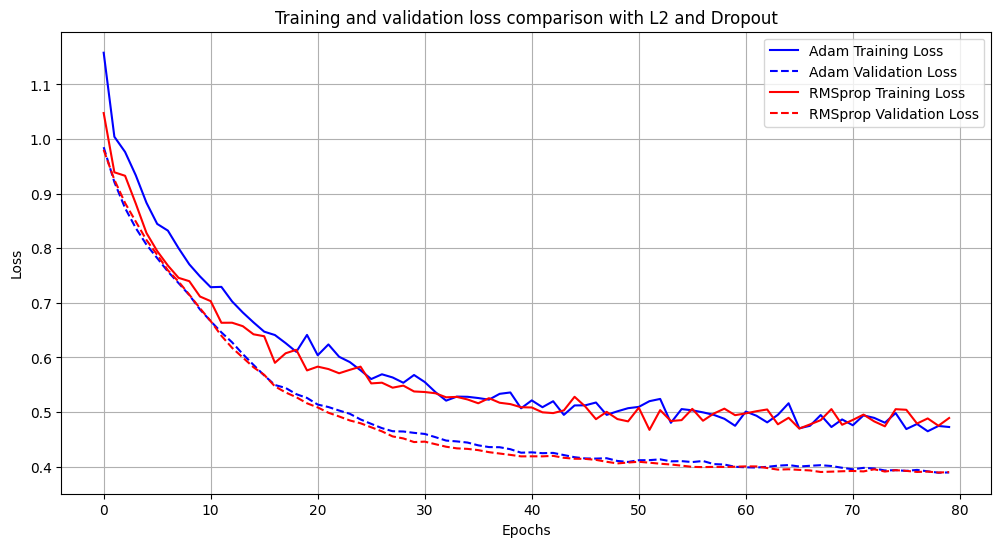

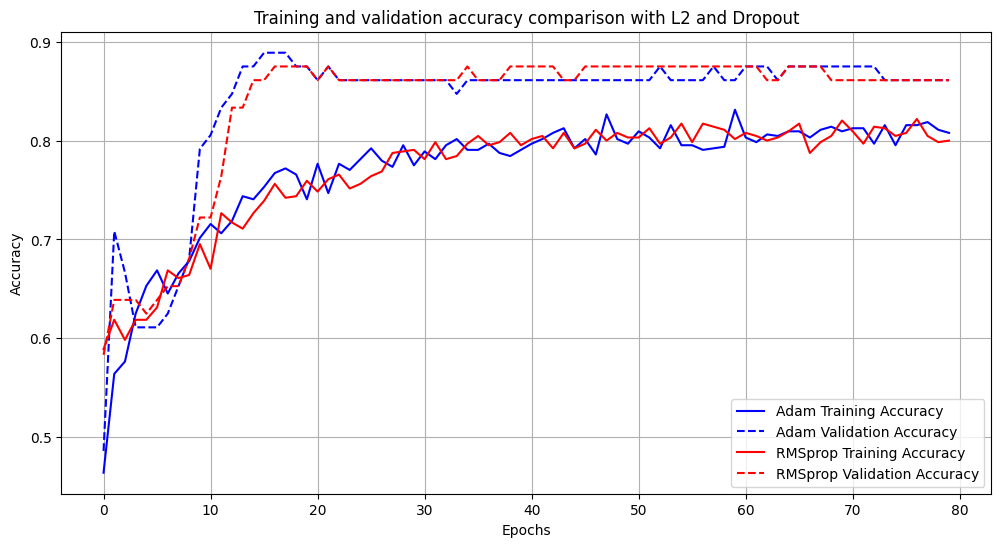

In [ ]:
# Plot the loss
plt.figure(figsize=(12, 6))
plt.plot(adam_history.history['loss'], label='Adam Training Loss', color='blue')
plt.plot(adam_history.history['val_loss'], label='Adam Validation Loss', color='blue', linestyle='--')
plt.plot(rmsprop_history.history['loss'], label='RMSprop Training Loss', color='red')
plt.plot(rmsprop_history.history['val_loss'], label='RMSprop Validation Loss', color='red', linestyle='--')
plt.title('Training and validation loss comparison with L2 and Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot the accuracy
plt.figure(figsize=(12, 6))
plt.plot(adam_history.history['accuracy'], label='Adam Training Accuracy', color='blue')
plt.plot(adam_history.history['val_accuracy'], label='Adam Validation Accuracy', color='blue', linestyle='--')
plt.plot(rmsprop_history.history['accuracy'], label='RMSprop Training Accuracy', color='red')
plt.plot(rmsprop_history.history['val_accuracy'], label='RMSprop Validation Accuracy', color='red', linestyle='--')
plt.title('Training and validation accuracy comparison with L2 and Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Increasing the dropout rate to 0.5 results in a slower initial decrease in loss and a more gradual increase in accuracy. The increased dropout also causes more pronounced jaggedness, indicating greater variability in training. Compared to a dropout rate of 0.2, the overall accuracy is slightly lower and the loss is marginally higher. Overall, there is no significant difference in performance.

The impact of L2 regularisation was also explored. While not shown above for conciseness, L2 regularisation of 0.01 appeared to yield similar accuracy and loss, but it helped alleviate the jaggedness in loss slightly, though not in accuracy. This was expected, as L2 regularisation directly penalises loss to discourage large weights. Accuracy is less sensitive to parameter changes as it only considers whether a prediction is correct or not, and does not capture the model's confidence in its predictions. The overall impact on the optimal loss value was not significant, but model stability was improved.



# Phase 3: Implementing early stopping

In [ ]:
# Import early stopping
from keras.callbacks import EarlyStopping

In [ ]:
# We will keep the L2 regulatisation and dropout rate defined in Phase 2

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

# Define optimizers with learning rate 0.001
adam_optimizer = Adam(learning_rate=0.001)
rmsprop_optimizer = RMSprop(learning_rate=0.001)

# Create models
adam_model = create_model(optimizer=adam_optimizer)
rmsprop_model = create_model(optimizer=rmsprop_optimizer)

# Train models with early stopping
adam_history = adam_model.fit(X_train, y_train, epochs=80, batch_size=16, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)
rmsprop_history = rmsprop_model.fit(X_train, y_train, epochs=80, batch_size=16, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

Adam optimizer with early stopping:
Test loss: 0.5040321350097656
Test accuracy: 0.7932960987091064

RMSprop optimizer with early stopping:
Test loss: 0.47664326429367065
Test accuracy: 0.8100558519363403


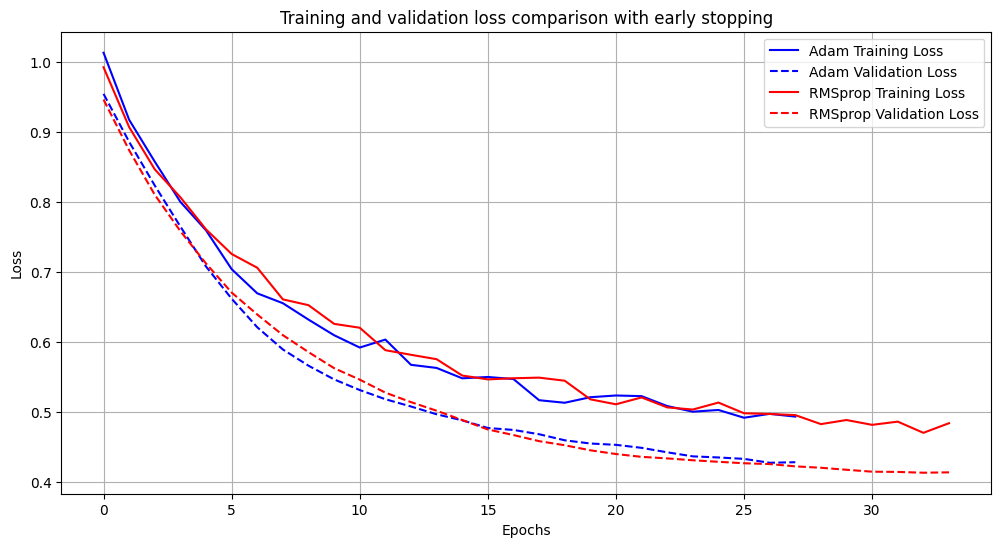

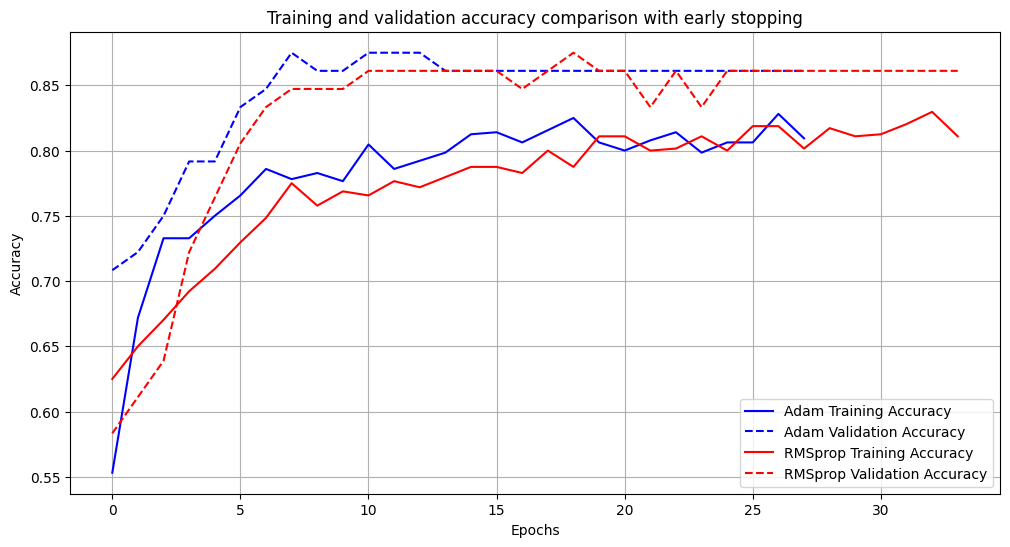

In [ ]:
# Evaluate the models
adam_test_loss, adam_test_acc = adam_model.evaluate(X_test, y_test, verbose=0)
rmsprop_test_loss, rmsprop_test_acc = rmsprop_model.evaluate(X_test, y_test, verbose=0)

print('Adam optimizer with early stopping:')
print('Test loss:', adam_test_loss)
print('Test accuracy:', adam_test_acc)

print('\nRMSprop optimizer with early stopping:')
print('Test loss:', rmsprop_test_loss)
print('Test accuracy:', rmsprop_test_acc)

# Plot the loss
plt.figure(figsize=(12, 6))
plt.plot(adam_history.history['loss'], label='Adam Training Loss', color='blue')
plt.plot(adam_history.history['val_loss'], label='Adam Validation Loss', color='blue', linestyle='--')
plt.plot(rmsprop_history.history['loss'], label='RMSprop Training Loss', color='red')
plt.plot(rmsprop_history.history['val_loss'], label='RMSprop Validation Loss', color='red', linestyle='--')
plt.title('Training and validation loss comparison with early stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot the accuracy
plt.figure(figsize=(12, 6))
plt.plot(adam_history.history['accuracy'], label='Adam Training Accuracy', color='blue')
plt.plot(adam_history.history['val_accuracy'], label='Adam Validation Accuracy', color='blue', linestyle='--')
plt.plot(rmsprop_history.history['accuracy'], label='RMSprop Training Accuracy', color='red')
plt.plot(rmsprop_history.history['val_accuracy'], label='RMSprop Validation Accuracy', color='red', linestyle='--')
plt.title('Training and validation accuracy comparison with early stopping')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


The incorporation of early stopping terminated the model training around 30-40 epochs, aligning with the optimal number of epochs identified in Phases 1 and 2. Using early stopping with a patience of 1 (the number of epochs to wait for an improvement in validation loss) significantly enhanced computational efficiency by preventing unnecessary training beyond the point of improvement.